In [44]:
### Projekat Statistika Hajdarevic Zlatko 2016203000

In [45]:
cd ../..

C:\


In [54]:
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm


atributi = ['zipcode','price','condition','sqft_living'] #odabiramo kolone koje cemo koristiti iz fajla koji ucitavamo komandom ispod
data_por = pd.read_csv("house_data.csv",usecols=atributi)#pravimo promenljivu sa imenom=data_por sa podacima iz .csv
podaci_sortirati=data_por.sort_values(by=['zipcode'])#Sortiram podatke jer zelim samo iz jedne opstine da izvucem podatke
t=(podaci_sortirati.iloc[0:300])#nakon sortiranja uzimam 350 podataka koje imaju vrednost zipcode='98001'
t #prikazujemo i pocetak i kraj dataFrame-a da vidimo da li su sortirani podaci iz jedne opstine


,price,sqft_living,condition,zipcode
11553,299999.0,2380,3,98001
18935,460000.0,2720,3,98001
16355,295000.0,1940,3,98001
6819,269500.0,1700,3,98001
18933,254999.0,1580,4,98001
292,360000.0,2160,3,98001
16342,280000.0,1600,3,98001
2165,238000.0,1088,3,98001
2161,332000.0,2120,3,98001
16318,274950.0,1840,3,98001


In [55]:
podaci=t.sort_values(by=['price'])# sortirao sam po ceni zbog fitovanja na kvadrat da bi linija isla kako treba
podaci=podaci.dropna()

In [56]:
#------------------------------------------------------------------
#uslovna i neuslovna verovatnoca
#------------------------------------------------------------------

In [57]:
#Neuslovna verovatnoca
#Izracunavamo koja je verovatnoca da cemo kupiti kvalitetnu nekretnine u datoj opstini na osnovu podataka
data_temp = podaci["condition"].value_counts()#izracunavamo koliko ima kojih nekretnina
data_temp

3    200
4     80
5     15
2      5
Name: condition, dtype: int64

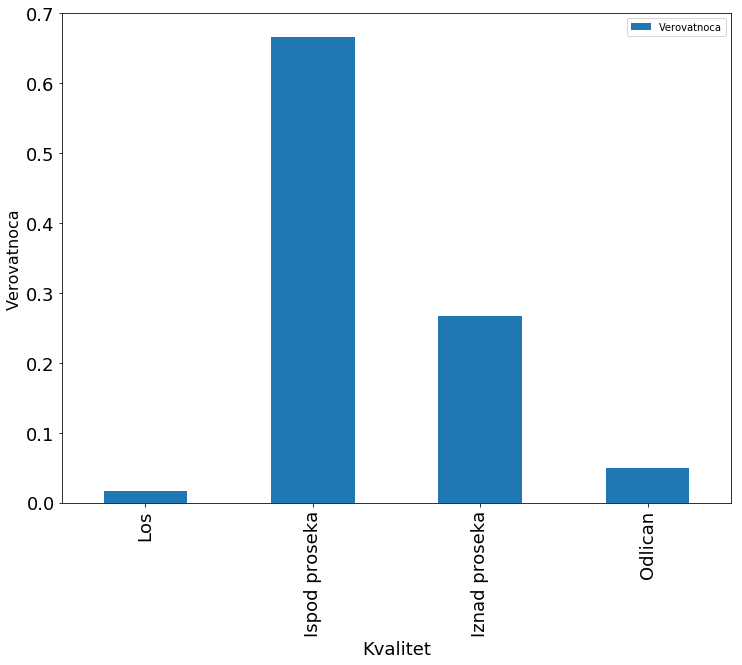

,Verovatnoca
Los,0.016667
Ispod proseka,0.666667
Iznad proseka,0.266667
Odlican,0.050000


In [58]:
P_kvalitet = pd.DataFrame((data_temp/data_temp.sum()).sort_index())  # sort_index - sortira prema nazivu vrste  - indeksu
#pojedinacni delimo sa ukupnim i dobijamo verovatnocu, zbir svih pojedinacnih je 1
P_kvalitet.index = ["Los","Ispod proseka","Iznad proseka","Odlican"]#indeksiramo stranice
P_kvalitet.columns = ["Verovatnoca"]# indeksiranje bar-a
P_kvalitet.plot.bar(figsize=(12,9),fontsize=18)
plt.ylabel("Verovatnoca",fontsize=16)
plt.xlabel("Kvalitet",fontsize=18)
plt.show()
P_kvalitet

In [59]:
#Verovatnoca da ce naci objekat sa odredjenim kvalitetom najveca verovatnoca je da cemo
#naci objekat ISPOD PROSEKA je 0.66

In [60]:
#Uslovna verovatnoca// Cena da je ispod 300,000 pod uslovom da je stanje iznad proseka i obrnuto
data_temp = podaci.loc[podaci["price"]<300000,"condition"]
data_temp=(data_temp.value_counts())  
data_temp

3    128
4     69
5     13
2      4
Name: condition, dtype: int64

In [61]:
data_temp1=(data_temp[5]+data_temp[4])/data_temp.sum()
data_temp1

0.38317757009345793

In [62]:
data_temp2=(data_temp[2] + data_temp[3])/data_temp.sum()
data_temp2

0.616822429906542

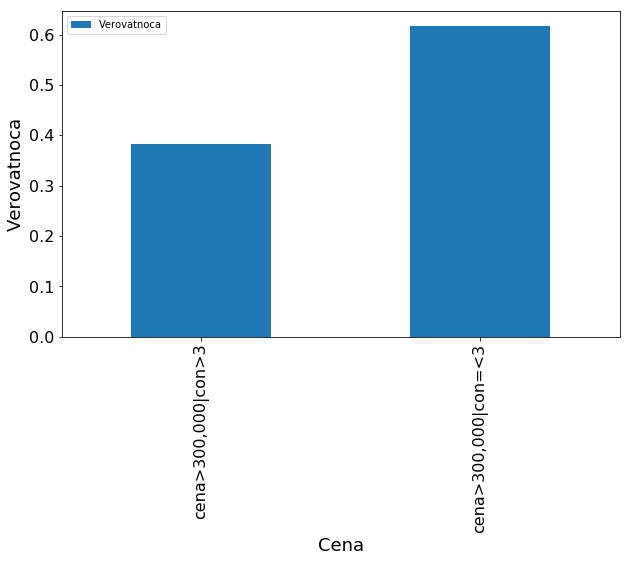

,Verovatnoca
"cena>300,000|con>3",0.383178
"cena>300,000|con=<3",0.616822


In [63]:
P_cene = pd.DataFrame([data_temp1, data_temp2])
P_cene.index = ["cena>300,000|con>3","cena>300,000|con=<3"]
P_cene.columns = ["Verovatnoca"]

# Crtanje bar grafika:
P_cene.plot.bar(figsize=(10,6),fontsize=16)
plt.xlabel("Cena",fontsize=18)
plt.ylabel("Verovatnoca",fontsize=18)
plt.show()
P_cene

In [64]:
#Uslovna verovatnoca da je ispod 300,000 cene mozemo da nadjemo objekat koji je
#u gornjoj granici(4 i 5) stanja je ~ 0.4 a donjoj granici(2 i 3) je ~ 0.6

In [65]:
#------------------------------------------------------------------
#Estimacija parametara raspodela pojedinačnih promenljivih
#------------------------------------------------------------------

In [66]:
podaci.describe()# estimirane vrednosti
#count koliko ih ima
#mean srednja vrednost svih
#std standardne devijacija
#min minimalna vrednost
#25% kvantil 0.25
#50% medijana-> vrednost sredine niza
#75% kvantil 0.75
#max najveca vrednost

,price,sqft_living,condition,zipcode
count,300.000000,300.000000,300.000000,300.0
mean,279652.983333,1883.556667,3.350000,98001.0
std,98285.343034,635.281740,0.601698,0.0
min,100000.000000,770.000000,2.000000,98001.0
25%,215875.000000,1440.000000,3.000000,98001.0
50%,259450.000000,1810.000000,3.000000,98001.0
75%,313418.250000,2234.750000,4.000000,98001.0
max,850000.000000,5440.000000,5.000000,98001.0


In [67]:
podaci.var() #estimirana vrednost varijanse
#

price          9.660009e+09
sqft_living    4.035829e+05
condition      3.620401e-01
zipcode        0.000000e+00
dtype: float64

In [68]:
data_por.cov() #izracunavanje kovarijanse: predstavlja meru jačine veze između promene dve promenljive

,price,sqft_living,condition,zipcode
price,1.347824e+11,2.367154e+08,8687.030331,-1.045072e+06
sqft_living,2.367154e+08,8.435337e+05,-35.114601,-9.800232e+03
condition,8.687030e+03,-3.511460e+01,0.423467,1.053428e-01
zipcode,-1.045072e+06,-9.800232e+03,0.105343,2.862788e+03


In [69]:
data_por.corr() #koliko i kako utice jedna promenljiva na ostale, da li ide u u plus ili minus povecavanje
#jedne promeljive.

,price,sqft_living,condition,zipcode
price,1.000000,0.702035,0.036362,-0.053203
sqft_living,0.702035,1.000000,-0.058753,-0.199430
condition,0.036362,-0.058753,1.000000,0.003026
zipcode,-0.053203,-0.199430,0.003026,1.000000


In [70]:
#------------------------------------------------------------------
#Estimacija funkcije gustine raspodele pomoću histograma i testiranje hipoteza o
#raspodeli korišćenjem Kolmogorov-Smirnov i/ili hi-kvadrat testa
#------------------------------------------------------------------

C:\Users\Zlatko-Laptop\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


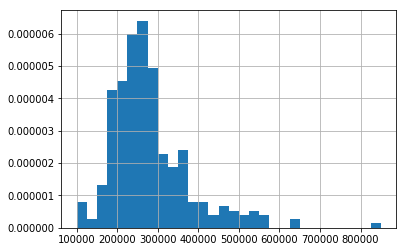

In [71]:
#histogram podataka cena
histcena = podaci['price'].hist(normed=True,bins=30) 
plt.show()

C:\Users\Zlatko-Laptop\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


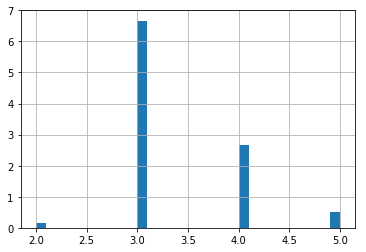

In [72]:
#histogram podataka stanje nekretnine
hist = podaci['condition'].hist(normed=True,bins=30) 
plt.show()

C:\Users\Zlatko-Laptop\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


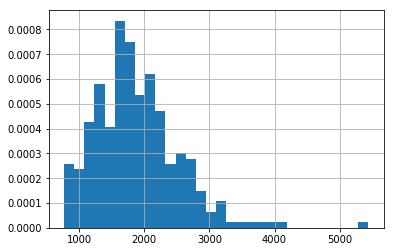

In [73]:
#histogram podataka kvadrata nekretnine
hist = podaci['sqft_living'].hist(normed=True,bins=30) 
plt.show()

C:\Users\Zlatko-Laptop\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


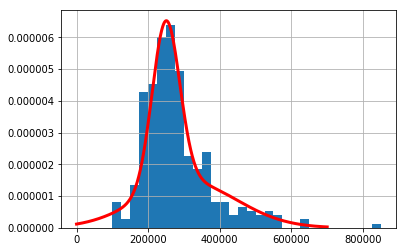

In [74]:
histcena = podaci['price'].hist(normed=True,bins=30)
korak=1
x = np.arange(0, 700000, korak)
m1=podaci['price'].mean()-30000
sig1=podaci['price'].std()-60000
m2=podaci['price'].mean()+30000
sig2=podaci['price'].std()+40000

P_norm_mix2 = np.array(0.5*norm.pdf(x, m1, sig1)+0.5*norm.pdf(x, m2, sig2))
plt.plot(x, P_norm_mix2, 'r', linewidth=3.0)
plt.show()

In [75]:
#Sada mozemo da izracunamo verovatnocu iz opsega
#verovatnoca da ce cena na celom skupu objekata biti izmedju 200000 i 400000
PP=np.array([korak*z for x,z in zip(x,P_norm_mix2) if (x>200000 and x<4000000)]) 
P_trazeno=PP.sum(axis=0) # sumiramo povrsine svih malih pravougaonika
print(P_trazeno)

0.8431911345697307


In [76]:
#verovatnoca da je cena izmedju 200,000 i 400,000 je ~ 0.8

In [77]:
# testiracemo da li je ovo normalna raspodele:
velicina_uzorka=100
stats.kstest(podaci['price'].sample(velicina_uzorka).dropna().values.T, cdf='norm',args=(podaci['price'].dropna().values.mean(), podaci['price'].dropna().values.std()))  
# u args stavljamo ocene matematickog ocekivanja i standardne devijacije
#sa nivoom znacajnosti oko pvalue+ odbacujemo hipotezu o normalnoj raspodeli

KstestResult(statistic=0.23205426865550338, pvalue=3.225383537031057e-05)

In [78]:
#---------------------------------------------------------
#Estimacija intervala poverenja ocena određenih parametara
#----------------------------------------------------------

C:\Users\Zlatko-Laptop\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


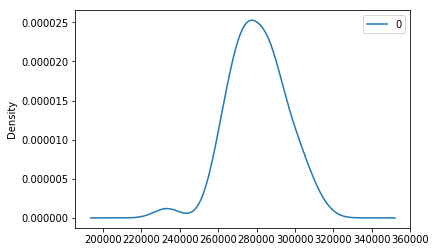

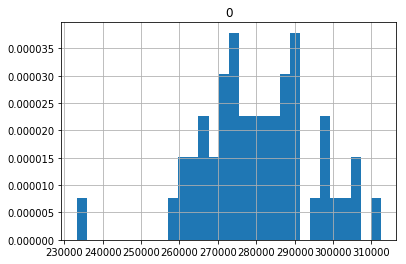

In [79]:
# hocemo da estimiramo srednju vrednost uzimajuci samo manji uzorak iz cene:
estimatori_srednje_vrednosti = [] #Ovde cemo da skladistimo rezultate      

velicina_uzorka=40 #Koliko uzimamo iz podataka
broj_estimacija_srednjih_vrednosti=50  # Koliko eksperimenata izvrsavamo
for x in range(broj_estimacija_srednjih_vrednosti):
    
    uzorak=podaci['price'].sample(velicina_uzorka)#Uzimamo uzorak
    estimatori_srednje_vrednosti.append( uzorak.values.mean() )#Izracunavamo srednju vrednost
    
# plotujemo estimaciju gustine verovatnoce raspodele srednjih vrednosti (pomocu histograma) - vidimo da je priblizno normalna!  
pd.DataFrame(estimatori_srednje_vrednosti).plot(kind="density")   

# histogram srednjih vrednosti:
hist = pd.DataFrame(estimatori_srednje_vrednosti).hist(normed=True,bins=30) 
plt.show()

In [80]:
std=podaci.std()['price']

alpha=0.2   # nivo poverenja je 1-alpha=0.2

print(estimatori_srednje_vrednosti[0])  # stampamo estimranu vrednost

# PRVI NACIN - SVODJENJE NA Z-RASPODELU (N(0,1))
red_kvantila=1-alpha/2
Kvantil = stats.norm.ppf(red_kvantila)  # Kvantil odgovarajuceg reda Z raspodele (normalna (0,1) raspodela)
                  
margina = Kvantil * (std/velicina_uzorka**0.5)

interval_poverenja = (estimatori_srednje_vrednosti[0] - margina, estimatori_srednje_vrednosti[0] + margina)  
print(interval_poverenja)

233250.5
(213334.8333870162, 253166.1666129838)


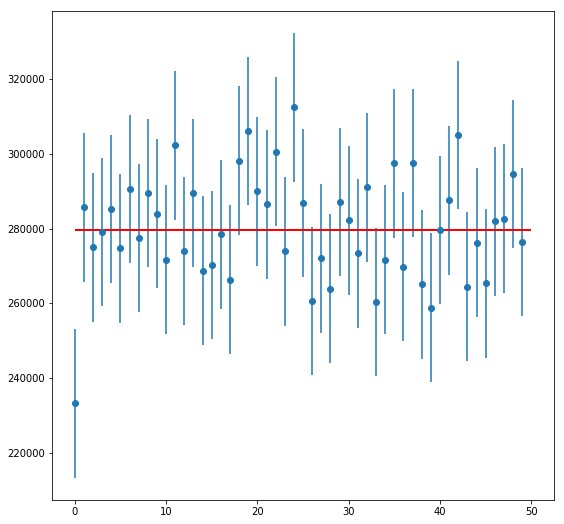

In [81]:
# crtanje svih intervala poverenja:

intervali_poverenja=[]
for i in range(0,50):
    intervali_poverenja.append((estimatori_srednje_vrednosti[i] - margina, estimatori_srednje_vrednosti[i] + margina))
    
# crtanje intervala poverenja:

plt.figure(figsize=(9,9))

# crtamo intervale pomocu plt.errorbar:
plt.errorbar(x=np.arange(0, 50), 
             y=estimatori_srednje_vrednosti[0:50], 
             yerr=[(gornja-donja)/2 for gornja,donja in intervali_poverenja],
             fmt='o')

plt.hlines(xmin=0, xmax=50,
           y=podaci.mean()['price'], 
           linewidth=2.0,
           color="red")

plt.show()

C:\Users\Zlatko-Laptop\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


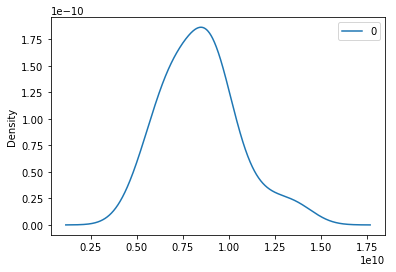

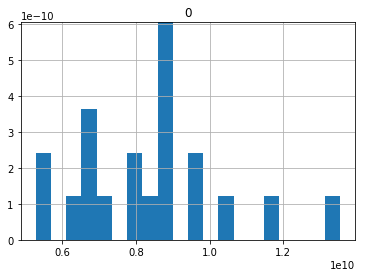

In [82]:
#ocena varijanse
uzorak=podaci['price'].sample(30)
# hocemo da estimiramo varijansu uzimajuci samo manji uzorak
estimatori_varijanse = []       

velicina_uzorka=30
broj_estimacija_varijansi=20   # ovo je broj estimacija, svaki je baziran na uzorku velicine 'velicina_uzorka'
for x in range(broj_estimacija_varijansi):         
    
    uzorak=podaci.sample(velicina_uzorka)
    estimatori_varijanse.append( uzorak.var()['price'])
    
print()   
    
# plotujemo estimaciju gustine verovatnoce raspodele ocena varijansi (pomocu histograma)  
pd.DataFrame(estimatori_varijanse).plot(kind="density")   

# histogram ocena varijansi:
hist = pd.DataFrame(estimatori_varijanse).hist(normed=True,bins=20) 
plt.show()

In [83]:
# testiracemo da li je srednja vrednost cene normalna raspodele:
velicina_uzorka=40
stats.kstest(podaci['price'].sample(velicina_uzorka).dropna().values.T, cdf='norm',args=(podaci['price'].dropna().values.mean(), podaci['price'].dropna().values.std()))  
# u args stavljamo ocene matematickog ocekivanja i standardne devijacije

KstestResult(statistic=0.18321107365250144, pvalue=0.11997974561079117)

In [84]:
#Mozemo da velikom sigurnoscu da kazemo da jest sto smo i videli iz dijagrama srednje cene

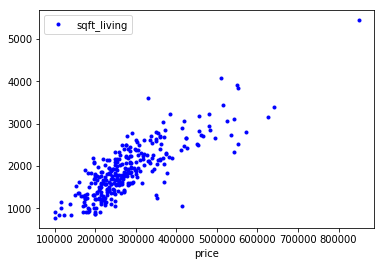

In [85]:
podaci.plot('price', 'sqft_living',style='b.')#naredba za plotovanje x osa je cena, y osa je iznos kvadratnih fita objekta
plt.show()#komanda za crtanje

In [86]:
#-----------------------------------------------------------------------------

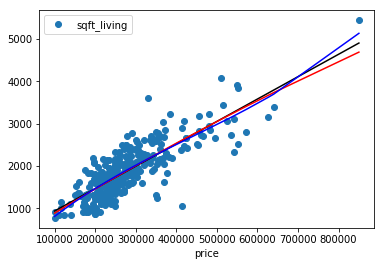

In [87]:
import statsmodels.formula.api as sm
from statsmodels.formula.api import ols

result= sm.ols('sqft_living ~ price', podaci).fit()#fitovanje podataka
res1 = sm.ols('sqft_living ~ price+I(price**2)', podaci).fit()  # fitovanje sa 4 kvadratom
res2 = sm.ols('sqft_living ~ price+I(price**2)+I(price**3)', podaci).fit()  # fitovanje sa 4 kvadratom


podaci.plot('price','sqft_living', style='o')
plt.plot(podaci.price, result.fittedvalues,'k')#normalno fitovanje
plt.plot(podaci.price, res1.fittedvalues,'r')#na kvadrat (prefitovan)
plt.plot(podaci.price, res2.fittedvalues,'b')#na 4 kvadrat (prefitovan)
plt.show()

In [88]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            sqft_living   R-squared:                       0.670
Model:                            OLS   Adj. R-squared:                  0.669
Method:                 Least Squares   F-statistic:                     605.0
Date:                Mon, 14 Jan 2019   Prob (F-statistic):           1.03e-73
Time:                        09:46:12   Log-Likelihood:                -2195.1
No. Observations:                 300   AIC:                             4394.
Df Residuals:                     298   BIC:                             4402.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    403.9991     63.747      6.338      0.000     278.547     529.451
price          0.0053      0.000     24.597      0.000       0.005       0.006
==============================================================================
Omnibus:                        9.575   Durbin-Watson:                   2.215
Prob(Omnibus):                  0.008   Jarque-Bera (JB):               18.120
Skew:                           0.034   Prob(JB):                     0.000116
Kurtosis:                       4.202   Cond. No.                     8.95e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.95e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [89]:
res1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            sqft_living   R-squared:                       0.671
Model:                            OLS   Adj. R-squared:                  0.669
Method:                 Least Squares   F-statistic:                     302.6
Date:                Mon, 14 Jan 2019   Prob (F-statistic):           2.18e-72
Time:                        09:46:12   Log-Likelihood:                -2194.7
No. Observations:                 300   AIC:                             4395.
Df Residuals:                     297   BIC:                             4407.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       294.1005    142.199      2.068      0.039      14.256     573.945
price             0.0060      0.001      7.190      0.000       0.004       0.008
I(price ** 2) -9.631e-10   1.11e-09     -0.865      0.388   -3.15e-09    1.23e-09
==============================================================================
Omnibus:                        9.970   Durbin-Watson:                   2.228
Prob(Omnibus):                  0.007   Jarque-Bera (JB):               19.325
Skew:                           0.035   Prob(JB):                     6.36e-05
Kurtosis:                       4.241   Cond. No.                     7.71e+11
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.71e+11. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [242]:
res2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            sqft_living   R-squared:                       0.677
Model:                            OLS   Adj. R-squared:                  0.675
Method:                 Least Squares   F-statistic:                     310.9
Date:                Sun, 13 Jan 2019   Prob (F-statistic):           1.47e-73
Time:                        08:55:34   Log-Likelihood:                -2192.0
No. Observations:                 300   AIC:                             4390.
Df Residuals:                     297   BIC:                             4401.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      7.346e-08   3.72e-09     19.737      0.000    6.61e-08    8.08e-08
price             0.0089      0.000     19.737      0.000       0.008       0.010
I(price ** 2) -9.656e-09   2.18e-09     -4.438      0.000   -1.39e-08   -5.37e-09
I(price ** 3)  7.329e-15   2.34e-15      3.131      0.002    2.72e-15    1.19e-14
==============================================================================
Omnibus:                        9.847   Durbin-Watson:                   2.247
Prob(Omnibus):                  0.007   Jarque-Bera (JB):               18.489
Skew:                           0.073   Prob(JB):                     9.67e-05
Kurtosis:                       4.207   Cond. No.                     7.83e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.83e+17. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [93]:
model2 = ols("price ~ sqft_living + condition", data_por).fit()   # zavisnost od dva faktora
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.499
Model:                            OLS   Adj. R-squared:                  0.499
Method:                 Least Squares   F-statistic:                 1.076e+04
Date:                Mon, 14 Jan 2019   Prob (F-statistic):               0.00
Time:                        09:48:21   Log-Likelihood:            -3.0014e+05
No. Observations:               21613   AIC:                         6.003e+05
Df Residuals:                   21610   BIC:                         6.003e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -1.972e+05   1.05e+04    -18.829      

In [94]:
model3 = ols("price ~ sqft_living * condition", data_por).fit()   # dva faktora + njihova interakcija (proizvod)
print(model3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.503
Model:                            OLS   Adj. R-squared:                  0.503
Method:                 Least Squares   F-statistic:                     7296.
Date:                Mon, 14 Jan 2019   Prob (F-statistic):               0.00
Time:                        09:55:19   Log-Likelihood:            -3.0004e+05
No. Observations:               21613   AIC:                         6.001e+05
Df Residuals:                   21609   BIC:                         6.001e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept               8.58e+